In [ ]:
!pip install yfinance

# Import Modules

In [ ]:
import pandas as pd
import yfinance as yf
import scipy.stats as st
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

# 1) Download the data

## Symbol List

In [ ]:
symblist = pd.read_csv('Ticker_Details.csv')
symblist

,Ticker,Description
0,GC=F,Gold
1,SI=F,Silver
2,CL=F,Crude Oil
3,^GSPC,S&P500
4,^RUT,Russel 2000 Index
5,ZN=F,10 Yr US T-Note futures
6,ZT=F,2 Yr US T-Note Futures
7,PL=F,Platinum
8,HG=F,Copper
9,DX=F,Dollar Index


## Price Data from Yahoo

In [ ]:
all_mkts_prices = yf.download(list(symblist['Ticker']),progress=False)['Adj Close']
all_mkts_prices.tail()

,CL=F,DX=F,EEM,EURUSD=X,GC=F,HG=F,PL=F,SI=F,ZN=F,ZS=F,ZT=F,^GSPC,^IXIC,^N100,^RUT,^VIX
Date,,,,,,,,,,,,,,,,
2022-02-28,95.720001,96.694000,46.730000,1.118105,1899.400024,4.4445,1037.800049,24.361000,127.453125,1644.25,107.988281,4373.939941,13751.400391,1268.800049,2048.090088,30.15
2022-03-01,103.410004,97.405998,46.110001,1.121592,1942.400024,4.5865,1051.099976,25.534000,128.718750,1705.50,108.210938,4306.259766,13532.459961,1229.680054,2008.510010,33.32
2022-03-02,110.599998,97.414001,46.189999,1.113276,1920.900024,4.6555,1067.599976,25.183001,127.312500,1677.50,107.800781,4386.540039,13752.019531,1243.869995,2058.870117,30.74
2022-03-03,107.669998,97.791000,45.540001,1.111235,1934.400024,4.7715,1080.099976,25.205000,127.562500,1680.25,107.777344,4363.490234,13537.940430,1216.780029,2032.410034,30.48
2022-03-04,115.000000,98.489998,44.619999,1.091584,1974.900024,4.9185,1126.000000,25.885000,128.437500,1656.75,107.550781,4328.870117,13313.438477,1159.760010,2000.899780,31.98


In [ ]:
all_mkts_prices = all_mkts_prices.rename(columns=dict(zip(symblist["Ticker"], symblist["Description"])))
all_mkts_prices.tail()

,Crude Oil,Dollar Index,MSCI EM ETF,Euro USD,Gold,Copper,Platinum,Silver,10 Yr US T-Note futures,Soybean,2 Yr US T-Note Futures,S&P500,Nasdaq,Euronext100,Russel 2000 Index,Volatility Index
Date,,,,,,,,,,,,,,,,
2022-02-28,95.720001,96.694000,46.730000,1.118105,1899.400024,4.4445,1037.800049,24.361000,127.453125,1644.25,107.988281,4373.939941,13751.400391,1268.800049,2048.090088,30.15
2022-03-01,103.410004,97.405998,46.110001,1.121592,1942.400024,4.5865,1051.099976,25.534000,128.718750,1705.50,108.210938,4306.259766,13532.459961,1229.680054,2008.510010,33.32
2022-03-02,110.599998,97.414001,46.189999,1.113276,1920.900024,4.6555,1067.599976,25.183001,127.312500,1677.50,107.800781,4386.540039,13752.019531,1243.869995,2058.870117,30.74
2022-03-03,107.669998,97.791000,45.540001,1.111235,1934.400024,4.7715,1080.099976,25.205000,127.562500,1680.25,107.777344,4363.490234,13537.940430,1216.780029,2032.410034,30.48
2022-03-04,115.000000,98.489998,44.619999,1.091584,1974.900024,4.9185,1126.000000,25.885000,128.437500,1656.75,107.550781,4328.870117,13313.438477,1159.760010,2000.899780,31.98


## Start the prices from 2004

In [ ]:
all_mkts_prices.apply(lambda x: x.dropna().index.min())

Crude Oil                 2000-08-23
Dollar Index              2000-06-22
MSCI EM ETF               2003-04-14
Euro USD                  2003-12-01
Gold                      2000-08-30
Copper                    2000-08-30
Platinum                  2000-01-04
Silver                    2000-08-30
10 Yr US T-Note futures   2000-09-21
Soybean                   2000-09-15
2 Yr US T-Note Futures    2000-06-02
S&P500                    1950-01-03
Nasdaq                    1971-02-05
Euronext100               1999-12-31
Russel 2000 Index         1987-09-10
Volatility Index          1990-01-02
dtype: datetime64[ns]

In [ ]:
all_mkts_prices = all_mkts_prices.fillna(method= 'ffill').dropna()
all_mkts_prices = all_mkts_prices.loc['2004':,:]
all_mkts_prices.tail()

,Crude Oil,Dollar Index,MSCI EM ETF,Euro USD,Gold,Copper,Platinum,Silver,10 Yr US T-Note futures,Soybean,2 Yr US T-Note Futures,S&P500,Nasdaq,Euronext100,Russel 2000 Index,Volatility Index
Date,,,,,,,,,,,,,,,,
2022-02-28,95.720001,96.694000,46.730000,1.118105,1899.400024,4.4445,1037.800049,24.361000,127.453125,1644.25,107.988281,4373.939941,13751.400391,1268.800049,2048.090088,30.15
2022-03-01,103.410004,97.405998,46.110001,1.121592,1942.400024,4.5865,1051.099976,25.534000,128.718750,1705.50,108.210938,4306.259766,13532.459961,1229.680054,2008.510010,33.32
2022-03-02,110.599998,97.414001,46.189999,1.113276,1920.900024,4.6555,1067.599976,25.183001,127.312500,1677.50,107.800781,4386.540039,13752.019531,1243.869995,2058.870117,30.74
2022-03-03,107.669998,97.791000,45.540001,1.111235,1934.400024,4.7715,1080.099976,25.205000,127.562500,1680.25,107.777344,4363.490234,13537.940430,1216.780029,2032.410034,30.48
2022-03-04,115.000000,98.489998,44.619999,1.091584,1974.900024,4.9185,1126.000000,25.885000,128.437500,1656.75,107.550781,4328.870117,13313.438477,1159.760010,2000.899780,31.98


# 2) Indicator Data

## Short Term Returns

In [ ]:
short_term_prds = [1,3,5,14,21]

short_term_rets = pd.DataFrame()
for prd in short_term_prds:
  prd_rets = all_mkts_prices.pct_change(prd).add_suffix("_ST_"+str(prd)).copy()
  short_term_rets = pd.concat([short_term_rets,prd_rets],axis=1)
short_term_rets.tail()

,Crude Oil_ST_1,Dollar Index_ST_1,MSCI EM ETF_ST_1,Euro USD_ST_1,Gold_ST_1,Copper_ST_1,Platinum_ST_1,Silver_ST_1,10 Yr US T-Note futures_ST_1,Soybean_ST_1,...,Platinum_ST_21,Silver_ST_21,10 Yr US T-Note futures_ST_21,Soybean_ST_21,2 Yr US T-Note Futures_ST_21,S&P500_ST_21,Nasdaq_ST_21,Euronext100_ST_21,Russel 2000 Index_ST_21,Volatility Index_ST_21
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-28,0.045092,0.000776,-0.013094,-0.000861,0.006838,-0.006149,-0.010582,0.015169,0.009530,0.033957,...,0.032740,0.092324,-0.003908,0.118537,-0.003029,-0.013067,-0.001392,-0.029962,0.040427,0.090022
2022-03-01,0.080339,0.007363,-0.013268,0.003118,0.022639,0.031950,0.012816,0.048151,0.009930,0.037251,...,0.031299,0.140165,0.005861,0.144247,-0.001082,-0.046349,-0.049679,-0.067371,-0.009830,0.341925
2022-03-02,0.069529,0.000082,0.001735,-0.007414,-0.011069,0.015044,0.015698,-0.013746,-0.010925,-0.016417,...,0.044823,0.114489,-0.004399,0.097481,-0.004868,-0.035192,-0.041404,-0.069788,0.003964,0.399818
2022-03-03,-0.026492,0.003870,-0.014072,-0.001834,0.007028,0.024917,0.011709,0.000874,0.001964,0.001639,...,0.036266,0.109815,-0.004390,0.087365,-0.005300,-0.049220,-0.061010,-0.090074,0.001424,0.379810
2022-03-04,0.068078,0.007148,-0.020202,-0.017684,0.020937,0.030808,0.042496,0.026979,0.006859,-0.013986,...,0.094373,0.156872,0.006243,0.072851,-0.006818,-0.033182,-0.040737,-0.117214,0.004957,0.313347


In [ ]:
short_term_rets.columns

Index(['Crude Oil_ST_1', 'Dollar Index_ST_1', 'MSCI EM ETF_ST_1',
       'Euro USD_ST_1', 'Gold_ST_1', 'Copper_ST_1', 'Platinum_ST_1',
       'Silver_ST_1', '10 Yr US T-Note futures_ST_1', 'Soybean_ST_1',
       '2 Yr US T-Note Futures_ST_1', 'S&P500_ST_1', 'Nasdaq_ST_1',
       'Euronext100_ST_1', 'Russel 2000 Index_ST_1', 'Volatility Index_ST_1',
       'Crude Oil_ST_3', 'Dollar Index_ST_3', 'MSCI EM ETF_ST_3',
       'Euro USD_ST_3', 'Gold_ST_3', 'Copper_ST_3', 'Platinum_ST_3',
       'Silver_ST_3', '10 Yr US T-Note futures_ST_3', 'Soybean_ST_3',
       '2 Yr US T-Note Futures_ST_3', 'S&P500_ST_3', 'Nasdaq_ST_3',
       'Euronext100_ST_3', 'Russel 2000 Index_ST_3', 'Volatility Index_ST_3',
       'Crude Oil_ST_5', 'Dollar Index_ST_5', 'MSCI EM ETF_ST_5',
       'Euro USD_ST_5', 'Gold_ST_5', 'Copper_ST_5', 'Platinum_ST_5',
       'Silver_ST_5', '10 Yr US T-Note futures_ST_5', 'Soybean_ST_5',
       '2 Yr US T-Note Futures_ST_5', 'S&P500_ST_5', 'Nasdaq_ST_5',
       'Euronext100_ST_5'

## Long Term Returns

In [ ]:
long_term_mkts = ['Gold','Silver', 'Crude Oil', 'S&P500','MSCI EM ETF']
long_term_prds = [60,90,180,250]

long_term_rets = pd.DataFrame()
for prd in long_term_prds:
  prd_rets = all_mkts_prices[long_term_mkts].pct_change(prd).add_suffix("_LT_"+str(prd)).copy()
  long_term_rets = pd.concat([long_term_rets,prd_rets],axis=1)
long_term_rets.tail()

,Gold_LT_60,Silver_LT_60,Crude Oil_LT_60,S&P500_LT_60,MSCI EM ETF_LT_60,Gold_LT_90,Silver_LT_90,Crude Oil_LT_90,S&P500_LT_90,MSCI EM ETF_LT_90,Gold_LT_180,Silver_LT_180,Crude Oil_LT_180,S&P500_LT_180,MSCI EM ETF_LT_180,Gold_LT_250,Silver_LT_250,Crude Oil_LT_250,S&P500_LT_250,MSCI EM ETF_LT_250
Date,,,,,,,,,,,,,,,,,,,,
2022-02-28,0.068579,0.095960,0.377464,-0.047418,-0.038042,0.051717,-0.008587,0.142789,-0.042164,-0.093394,0.066001,-0.063579,0.299484,0.035304,-0.129186,0.098618,-0.072068,0.463832,0.102042,-0.119878
2022-03-01,0.089644,0.135501,0.435253,-0.081184,-0.065588,0.083505,0.060118,0.221618,-0.058698,-0.100782,0.093509,-0.012148,0.415412,0.014087,-0.136777,0.122385,-0.016940,0.595833,0.086696,-0.135230
2022-03-02,0.077100,0.124743,0.528469,-0.066934,-0.067691,0.068413,0.041093,0.338011,-0.036281,-0.091892,0.077765,-0.035430,0.513410,0.034113,-0.140511,0.112404,-0.032539,0.712074,0.103776,-0.134844
2022-03-03,0.090048,0.147037,0.517761,-0.065123,-0.076402,0.073712,0.045113,0.300205,-0.050676,-0.105538,0.089435,-0.032326,0.468895,0.022735,-0.160304,0.116730,-0.042400,0.794500,0.114426,-0.131051
2022-03-04,0.107690,0.168096,0.604577,-0.081313,-0.095783,0.107628,0.081019,0.376092,-0.060041,-0.110699,0.111618,-0.007553,0.553005,0.011253,-0.184087,0.134088,-0.015480,0.872354,0.106251,-0.158997


In [ ]:
long_term_rets.columns

Index(['Gold_LT_60', 'Silver_LT_60', 'Crude Oil_LT_60', 'S&P500_LT_60',
       'MSCI EM ETF_LT_60', 'Gold_LT_90', 'Silver_LT_90', 'Crude Oil_LT_90',
       'S&P500_LT_90', 'MSCI EM ETF_LT_90', 'Gold_LT_180', 'Silver_LT_180',
       'Crude Oil_LT_180', 'S&P500_LT_180', 'MSCI EM ETF_LT_180',
       'Gold_LT_250', 'Silver_LT_250', 'Crude Oil_LT_250', 'S&P500_LT_250',
       'MSCI EM ETF_LT_250'],
      dtype='object')

## SMA Indicators

In [ ]:
sma_mkts = ['Gold']
sma_prds = [15,30,60,90,180]

sma_vals = pd.DataFrame()
for prd in sma_prds:
  prd_sma = all_mkts_prices[sma_mkts].rolling(prd).mean()
  prd_sma = (all_mkts_prices[sma_mkts] / prd_sma) - 1
  prd_sma = prd_sma.add_suffix('_SMA'+str(prd))
  sma_vals = pd.concat([sma_vals,prd_sma],axis=1)
sma_vals.tail()

,Gold_SMA15,Gold_SMA30,Gold_SMA60,Gold_SMA90,Gold_SMA180
Date,,,,,
2022-02-28,0.011898,0.028131,0.041172,0.044039,0.053964
2022-03-01,0.030568,0.048944,0.063191,0.066699,0.077273
2022-03-02,0.016080,0.035883,0.050105,0.054101,0.064894
2022-03-03,0.019690,0.041443,0.055948,0.060650,0.071854
2022-03-04,0.036156,0.060524,0.076176,0.081592,0.093628


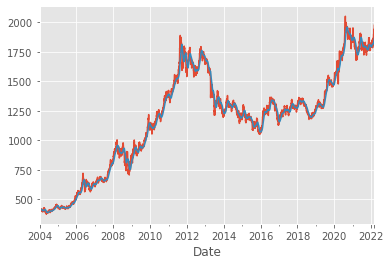

In [ ]:
all_mkts_prices['Gold'].plot()
all_mkts_prices['Gold'].rolling(30).mean().plot()

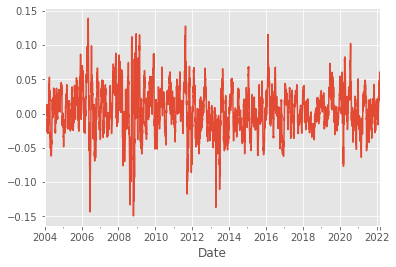

In [ ]:
mean_vals = all_mkts_prices['Gold'].rolling(30).mean()
((all_mkts_prices['Gold'] / mean_vals) - 1).plot()

## EMA Indicators

In [ ]:
ema_mkts = ['Gold']
ema_prds = [90,180]

ema_vals = pd.DataFrame()
for prd in ema_prds:
  prd_ema = all_mkts_prices[ema_mkts].ewm(span=prd,adjust=True,ignore_na=True).mean()
  prd_ema = (all_mkts_prices[ema_mkts] / prd_ema) - 1
  prd_ema = prd_ema.add_suffix('_EMA'+str(prd))
  ema_vals = pd.concat([ema_vals,prd_ema],axis=1)
ema_vals.tail()

,Gold_EMA90,Gold_EMA180
Date,,
2022-02-28,0.040241,0.047145
2022-03-01,0.062301,0.070013
2022-03-02,0.049377,0.057490
2022-03-03,0.055436,0.064158
2022-03-04,0.075700,0.085402


## Collect all the Indicators

In [ ]:
all_indcs = pd.concat([short_term_rets,long_term_rets,sma_vals,ema_vals],axis=1).dropna()
all_indcs.tail()

,Crude Oil_ST_1,Dollar Index_ST_1,MSCI EM ETF_ST_1,Euro USD_ST_1,Gold_ST_1,Copper_ST_1,Platinum_ST_1,Silver_ST_1,10 Yr US T-Note futures_ST_1,Soybean_ST_1,...,Crude Oil_LT_250,S&P500_LT_250,MSCI EM ETF_LT_250,Gold_SMA15,Gold_SMA30,Gold_SMA60,Gold_SMA90,Gold_SMA180,Gold_EMA90,Gold_EMA180
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-28,0.045092,0.000776,-0.013094,-0.000861,0.006838,-0.006149,-0.010582,0.015169,0.009530,0.033957,...,0.463832,0.102042,-0.119878,0.011898,0.028131,0.041172,0.044039,0.053964,0.040241,0.047145
2022-03-01,0.080339,0.007363,-0.013268,0.003118,0.022639,0.031950,0.012816,0.048151,0.009930,0.037251,...,0.595833,0.086696,-0.135230,0.030568,0.048944,0.063191,0.066699,0.077273,0.062301,0.070013
2022-03-02,0.069529,0.000082,0.001735,-0.007414,-0.011069,0.015044,0.015698,-0.013746,-0.010925,-0.016417,...,0.712074,0.103776,-0.134844,0.016080,0.035883,0.050105,0.054101,0.064894,0.049377,0.057490
2022-03-03,-0.026492,0.003870,-0.014072,-0.001834,0.007028,0.024917,0.011709,0.000874,0.001964,0.001639,...,0.794500,0.114426,-0.131051,0.019690,0.041443,0.055948,0.060650,0.071854,0.055436,0.064158
2022-03-04,0.068078,0.007148,-0.020202,-0.017684,0.020937,0.030808,0.042496,0.026979,0.006859,-0.013986,...,0.872354,0.106251,-0.158997,0.036156,0.060524,0.076176,0.081592,0.093628,0.075700,0.085402


# 3) Target Data

## Future Returns

In [ ]:
target_prd = 22
target_rets = all_mkts_prices['Gold'].pct_change(target_prd).shift(-22).dropna()

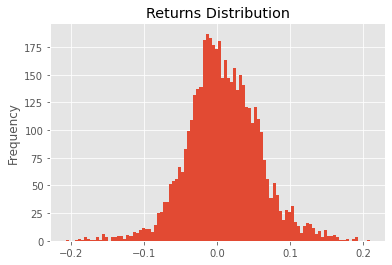

In [ ]:
target_rets.plot(kind='hist',bins=100)
plt.title('Returns Distribution')
plt.show()

In [ ]:
target_rets.quantile(0.8)

0.047684426743068414

## Returns To Z-Scores

In [ ]:
target_rets_zscrs = (target_rets - target_rets.expanding().mean()) / target_rets.expanding().std()

## Z-Score Threshold

In [ ]:
#Select Threshold p (left tail probability)
p= 0.80
#Get z-Value
z = st.norm.ppf(p)
z

0.8416212335729143

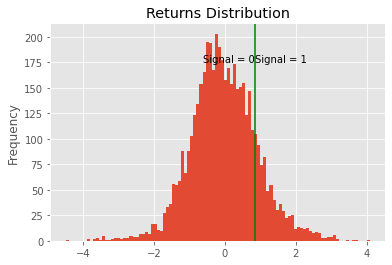

In [ ]:
target_rets_zscrs.plot(kind='hist',bins=100)
plt.axvline(z,color='green')
plt.title('Returns Distribution')
plt.show()

## Signals based on Threshold

In [ ]:
target_signals = (target_rets_zscrs>z).astype('int')
target_signals.value_counts()

0    3938
1     782
Name: Gold, dtype: int64

## Price Vs Signals

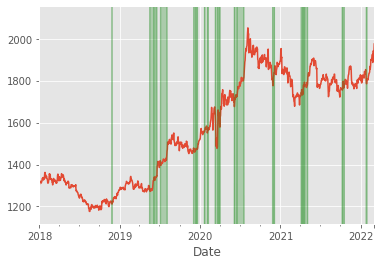

In [ ]:
strt_yr = '2018'
max_val = all_mkts_prices.loc[strt_yr:,'Gold'].max() * 1.05
min_val = all_mkts_prices.loc[strt_yr:,'Gold'].min() * 0.95
all_mkts_prices.loc[strt_yr:,'Gold'].plot()
target_signals.loc[strt_yr:].replace({0:np.nan,1:max_val}).plot(kind='area',alpha=0.25,color='green')
plt.ylim(min_val,max_val)
plt.show()

# 4) Model Building

## Train Test Split

In [ ]:
X_train = all_indcs.loc[:'2018',:]
X_test = all_indcs.loc['2018':,:]

y_train = target_signals.loc[target_signals.index.isin(X_train.index)]
y_test = target_signals.loc[target_signals.index.isin(X_test.index)]

X_train = X_train.loc[X_train.index.isin(y_train.index),:]
X_test = X_test.loc[X_test.index.isin(y_test.index),:]

cur_test = all_indcs.loc[X_test.index.max():,:]

## Scale the Variables

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train),columns = X_train.columns,index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns,index=X_test.index)

In [ ]:
X_train.shape

(3663, 107)

## Create Model

In [ ]:
def create_model(hidNodes):
    model = Sequential()
    model.add(Dense(50, input_dim=107, activation='relu'))
    model.add(Dense(hidNodes,activation = 'relu'))
    model.add(Dense(1,activation = 'sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer = 'adam')
    return model

## Parameter Grid

In [ ]:
params = {'batch_size':[500],
          'hidNodes':[10,20,30],
          'epochs':[100]
         }

## Grid Search CV

In [ ]:
model = KerasClassifier(create_model,verbose=0)
grid = GridSearchCV(estimator=model, param_grid = params,return_train_score=True,scoring = 'f1')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [ ]:
grid_results = grid.fit(X_train,y_train)
grid.best_params_

{'batch_size': 500, 'epochs': 100, 'hidNodes': 30}

## Performance Metrics

In [ ]:
def get_metrics_new(y_true, y_pred,exp_name):
    acc_score_val = accuracy_score(y_true, y_pred)
    recall_score_val = recall_score(y_true, y_pred)
    precision_score_val = precision_score(y_true, y_pred)
    f1_score_val = f1_score(y_true, y_pred)
    scores = pd.DataFrame([[acc_score_val,recall_score_val,precision_score_val,f1_score_val]])
    scores.columns = ['accuracy','recall','precision','f1score']
    scores.index = [exp_name]
    return scores

In [ ]:
testpreds = grid.predict(X_test)
get_metrics_new(y_test, testpreds, 'TestPreds')

,accuracy,recall,precision,f1score
TestPreds,0.867041,0.129771,0.377778,0.193182


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, testpreds)

array([[909,  28],
       [114,  17]])

Total Test Returns

In [ ]:
target_rets.loc[y_test.index].describe()

count    1068.000000
mean        0.007806
std         0.036769
min        -0.083884
25%        -0.017219
50%         0.003417
75%         0.030347
max         0.162393
Name: Gold, dtype: float64

Actual Test Returns

In [ ]:
target_rets.loc[y_test[y_test==1].index].describe()

count    131.000000
mean       0.074936
std        0.024242
min        0.051018
25%        0.058283
50%        0.068149
75%        0.080094
max        0.162393
Name: Gold, dtype: float64

Predicted Returns

In [ ]:
testpreds = pd.Series(testpreds.reshape(1,-1)[0],index=y_test.index)
testpreds.loc[testpreds==1].index
target_rets.loc[testpreds.loc[testpreds==1].index].describe()

count    45.000000
mean      0.040282
std       0.048191
min      -0.029293
25%       0.001808
50%       0.035687
75%       0.059369
max       0.162393
Name: Gold, dtype: float64

In [ ]:
pd.Series(grid.predict(cur_test).reshape(1,-1)[0],index=cur_test.index)

Date
2022-02-02    0
2022-02-03    0
2022-02-04    0
2022-02-07    0
2022-02-08    0
2022-02-09    0
2022-02-10    0
2022-02-11    0
2022-02-14    0
2022-02-15    0
2022-02-16    0
2022-02-17    0
2022-02-18    0
2022-02-21    0
2022-02-22    0
2022-02-23    0
2022-02-24    0
2022-02-25    0
2022-02-28    0
2022-03-01    0
2022-03-02    0
2022-03-03    0
2022-03-04    0
dtype: int64